# Daily total of bike counts conducted on the Brooklyn Bridge from 01 April 2017 to 31 October 2017. Source: NYC Open Data: Bicycle Counts for East River Bridges

Predicting the BB_COUNT based on the features of the day (temperature, what day etc.)

## Linear Regression

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# import the data
df = pd.read_csv(
    'nyc_bb_bicyclist_counts.csv',
    header=0, 
    parse_dates=[0], 
    index_col=[0],
    date_format="%d-%b-%y")

ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

# Define the target and independent columns
target_column = "BB_COUNT"
independent_columns = ["HIGH_T", "LOW_T", "PRECIP", "MONTH", "DAY_OF_WEEK"]

# Extract features (X) and target (y)
X = df[independent_columns]
y = df[target_column]

# Check shapes
print(X.shape, y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor: One-hot encode categorical variables and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["HIGH_T", "LOW_T", "PRECIP", "MONTH"]),  # Scale continuous variables
        ('cat', OneHotEncoder(), ["DAY_OF_WEEK"])  # One-hot encode categorical variables
    ])

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())   # Linear Regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline.predict(X_test)

# Calculate AIC
# Number of observations (n)
n = len(y_test)

# Residual sum of squares (RSS)
RSS = np.sum((y_test - y_pred) ** 2)

# Number of model parameters (k) — This includes the intercept and coefficients
k = X_train.shape[1] + 1  # Number of features + intercept

# Calculate AIC
AIC = n * np.log(RSS / n) + 2 * k
print(f"AIC: {AIC}")

# Evaluate model performance
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


(214, 5) (214,)
AIC: 562.1437415160555
Training set size: (171, 5)
Test set size: (43, 5)
Mean Absolute Error (MAE): 468.4673570796978
Mean Squared Error (MSE): 360065.2342885124
Root Mean Squared Error (RMSE): 600.054359444636
R² Score: 0.4997462807708185


c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


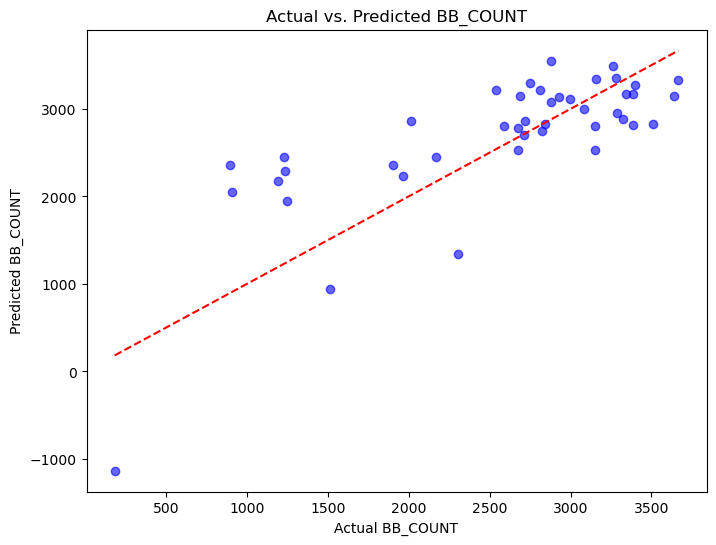

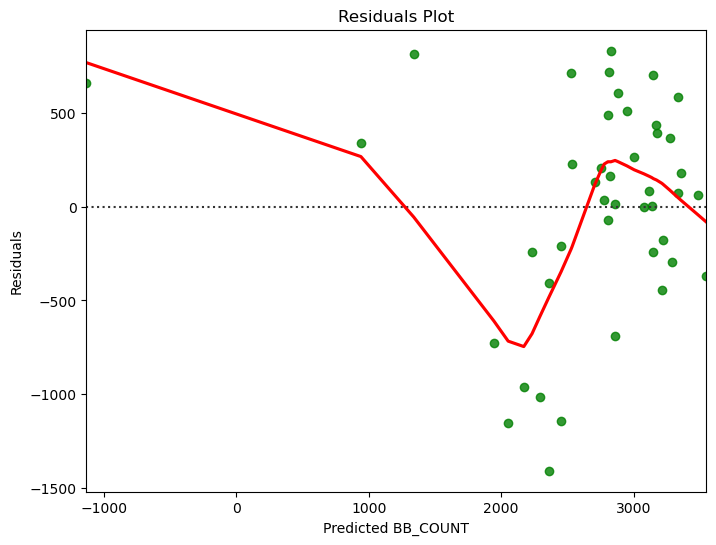

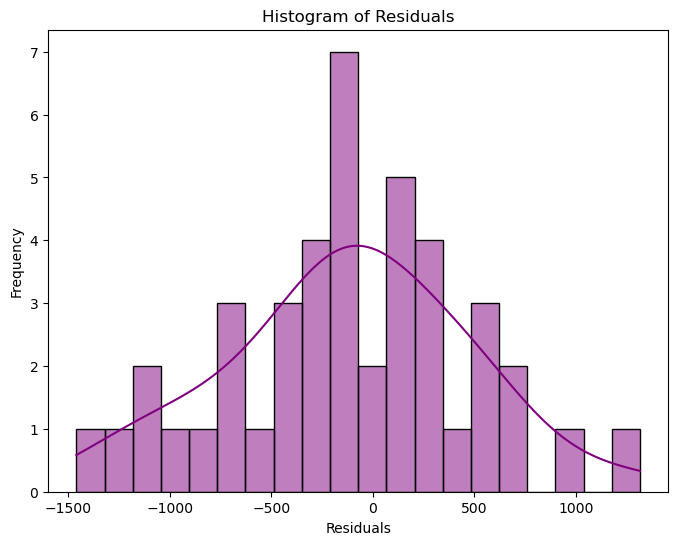

In [16]:
# 1. Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.title("Actual vs. Predicted BB_COUNT")
plt.xlabel("Actual BB_COUNT")
plt.ylabel("Predicted BB_COUNT")
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green', line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Predicted BB_COUNT")
plt.ylabel("Residuals")
plt.show()

# 3. Histogram of residuals (Check normality of residuals)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

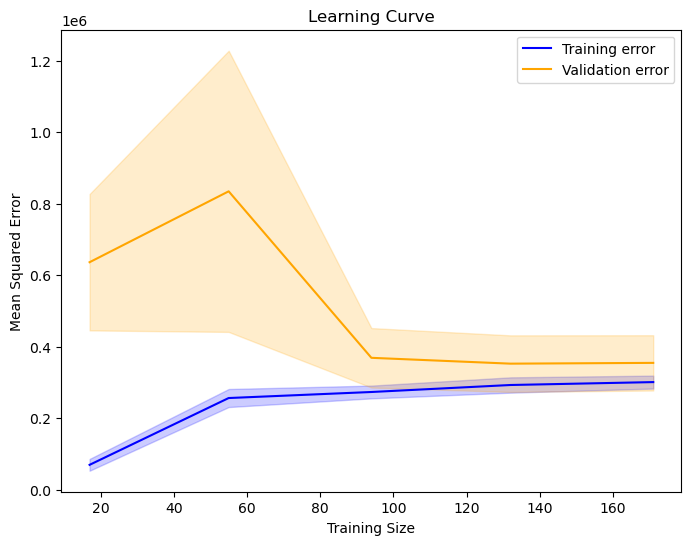

In [17]:
# 4. Learning curve 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and std
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation error', color='orange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='orange')
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

## GLM Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  171
Model:                            GLM   Df Residuals:                      160
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                      3.2526e+05
Method:                          IRLS   Log-Likelihood:                -1322.2
Date:                Thu, 05 Dec 2024   Deviance:                   5.2042e+07
Time:                        10:12:21   Pearson chi2:                 5.20e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7261
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2631.1138    119.220     22.069      0.0

c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


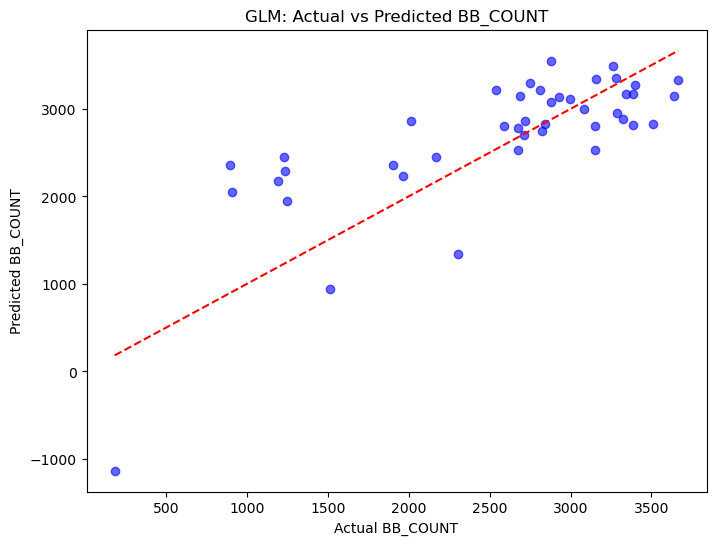

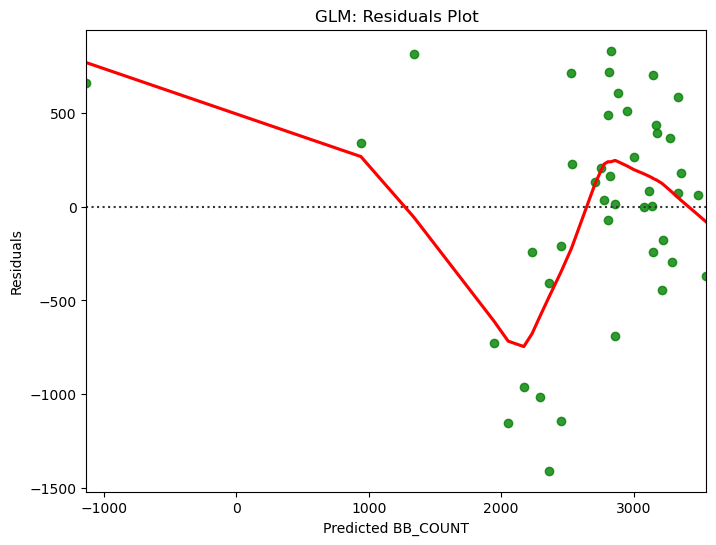

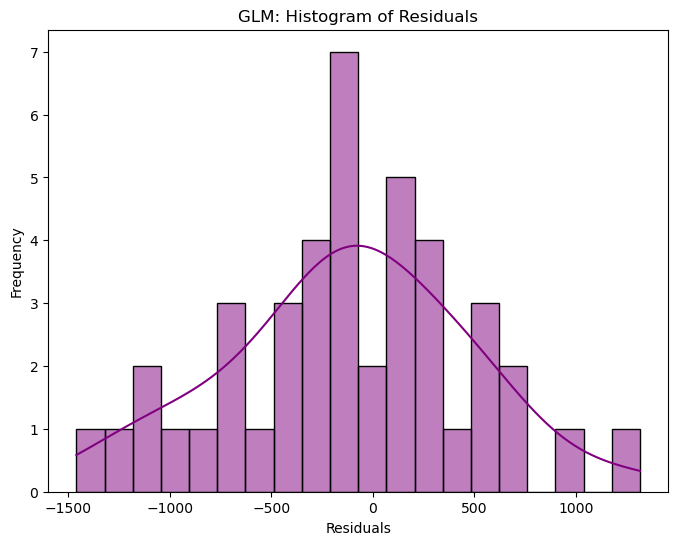

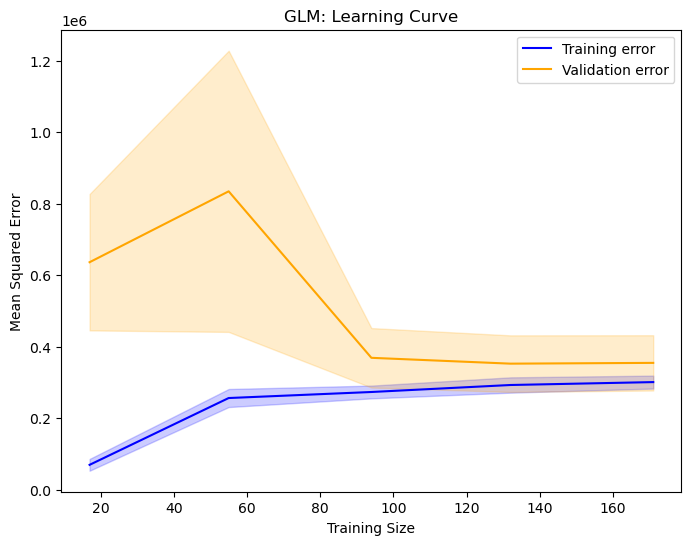

In [18]:
import statsmodels.api as sm
from statsmodels.genmod.families import Gaussian
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocess the data for GLM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["HIGH_T", "LOW_T", "PRECIP", "MONTH"]),  # Scale continuous variables
        ('cat', OneHotEncoder(drop='first'), ["DAY_OF_WEEK"])  # One-hot encode categorical variables, drop first to avoid multicollinearity
    ])

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = sm.add_constant(X_preprocessed)  # Add intercept (constant) term

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fit the GLM model using Gaussian family
glm_model = sm.GLM(y_train, X_train, family=Gaussian()).fit()

# Display the summary of the model
print(glm_model.summary())

# Make predictions
y_pred_glm = glm_model.predict(X_test)

# Evaluate the model
print("GLM Performance Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_glm))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_glm))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred_glm, squared=False))
print("R² Score:", r2_score(y_test, y_pred_glm))

# Visualization 1: Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_glm, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("GLM: Actual vs Predicted BB_COUNT")
plt.xlabel("Actual BB_COUNT")
plt.ylabel("Predicted BB_COUNT")
plt.show()

# Visualization 2: Residual Plot
residuals_glm = y_test - y_pred_glm
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_glm, y=residuals_glm, lowess=True, color='green', line_kws={'color': 'red'})
plt.title("GLM: Residuals Plot")
plt.xlabel("Predicted BB_COUNT")
plt.ylabel("Residuals")
plt.show()

# Visualization 3: Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_glm, kde=True, color='purple', bins=20)
plt.title("GLM: Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Visualization 4: Learning Curve
# Use sklearn's learning curve with GLM predictions
from sklearn.linear_model import LinearRegression  # GLM doesn't integrate directly with sklearn's learning_curve
from sklearn.pipeline import Pipeline

# Mimic GLM pipeline with preprocessing and LinearRegression
glm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Placeholder for simplicity, Gaussian family in glm behaves similarly
])

train_sizes, train_scores, test_scores = learning_curve(glm_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train/test scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation error', color='orange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='orange')
plt.title("GLM: Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


## Comparison: Linear Regression vs GLM

c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Comparison:
Metric         Linear Regression   GLM                 
MAE            468.4674            468.4674            
MSE            360065.2343         360065.2343         
RMSE           600.0544            600.0544            
R²             0.4997              0.4997              


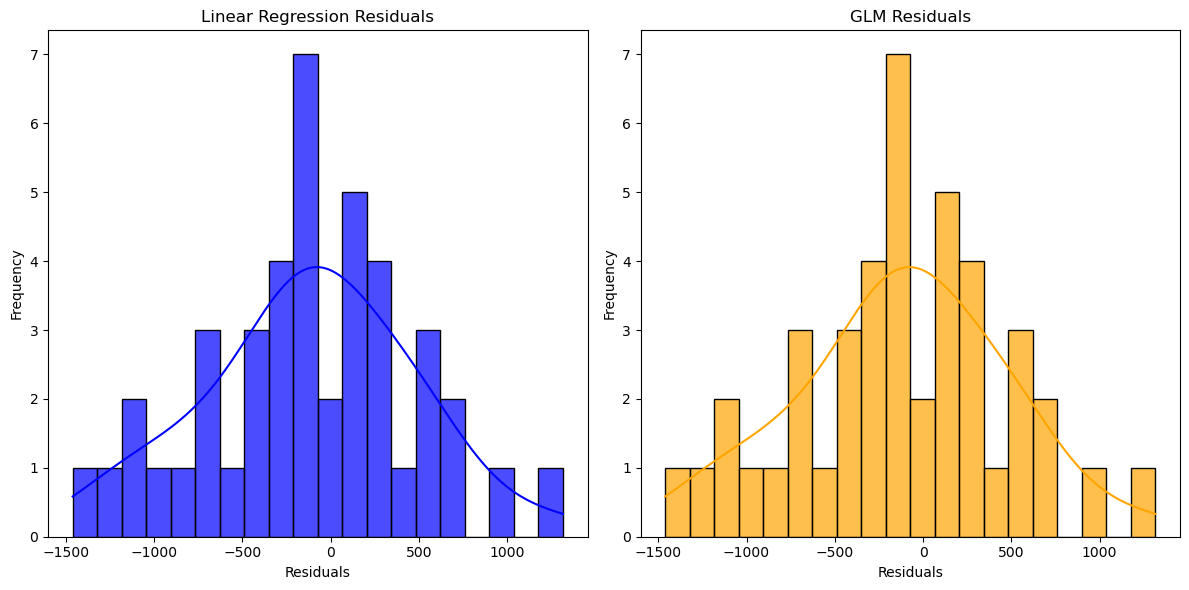

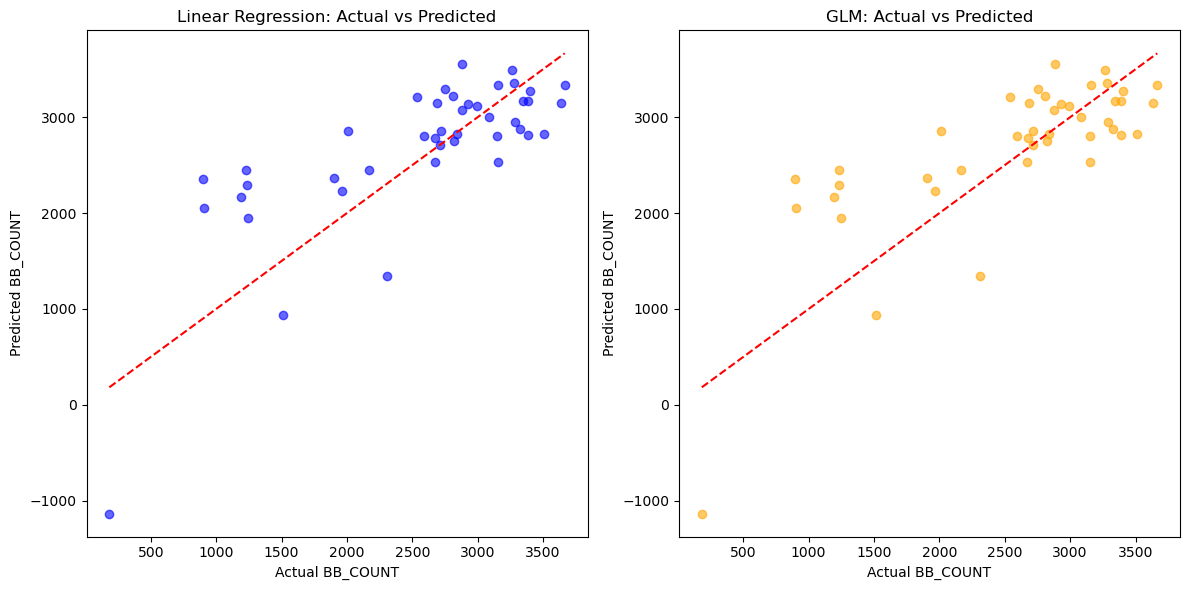

GLM AIC: 2666.3066308502453
GLM BIC: 52041505.93889782


c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [21]:
# 1. Metrics Comparison
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# GLM Metrics
mae_glm = mean_absolute_error(y_test, y_pred_glm)
mse_glm = mean_squared_error(y_test, y_pred_glm)
rmse_glm = mean_squared_error(y_test, y_pred_glm, squared=False)
r2_glm = r2_score(y_test, y_pred_glm)

# Print comparison table
print("Model Comparison:")
print(f"{'Metric':<15}{'Linear Regression':<20}{'GLM':<20}")
print(f"{'MAE':<15}{mae_lr:<20.4f}{mae_glm:<20.4f}")
print(f"{'MSE':<15}{mse_lr:<20.4f}{mse_glm:<20.4f}")
print(f"{'RMSE':<15}{rmse_lr:<20.4f}{rmse_glm:<20.4f}")
print(f"{'R²':<15}{r2_lr:<20.4f}{r2_glm:<20.4f}")

# 2. Residual Histograms
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_lr, bins=20, kde=True, color='blue', alpha=0.7)
plt.title("Linear Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# GLM Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_glm, bins=20, kde=True, color='orange', alpha=0.7)
plt.title("GLM Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 3. Predicted vs Actual Comparison
plt.figure(figsize=(12, 6))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual BB_COUNT")
plt.ylabel("Predicted BB_COUNT")

# GLM Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_glm, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("GLM: Actual vs Predicted")
plt.xlabel("Actual BB_COUNT")
plt.ylabel("Predicted BB_COUNT")

plt.tight_layout()
plt.show()

# 4. AIC and BIC for GLM (Linear Regression doesn't provide these)
print("GLM AIC:", glm_model.aic)
print("GLM BIC:", glm_model.bic)